In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi, inf
from sympy import limit
import time
from scipy.special import jv 
from itertools import product
import time
from scipy import real

In [11]:
# Parameters 
data1 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "e2" : 1, "n1" : 1, "theta1" : 0, "theta2" : pi,  'w' : 1}
data1['w'] = data1['c']*2*pi/(600*10**(-9))
data1["e2"] = 1
data1["m2"] = 2
data1["delta"] = data1["alpha"]*data1["m1"]*data1["m2"]*(data1["theta2"] - data1["theta1"])/pi
data1["k1"] = data1["n1"]*data1["w"]/data1["c"]
data1["n2"] = np.sqrt(data1['e2']*data1['m2'])
data1["k2"] = data1["n2"]*data1["w"]/data1["c"]
data1['scale'] = 1 

dataMu2 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "theta1" : 0, "theta2" : 0, "theta3": pi,  "w" : 1}
dataMu2['w'] = dataMu2['c']*2*pi/(600*10**(-9))
dataMu2["e3"] = 1
dataMu2["m3"] = 2
dataMu2["n3"] = np.sqrt(dataMu2["m3"]*dataMu2["e3"])
dataMu2["e2"] = 1
dataMu2["m2"] = 10**5
dataMu2["n2"] = 10**(5/2)
dataMu2["k1"] = dataMu2["n1"]*dataMu2["w"]/dataMu2["c"]
dataMu2["k2"] = dataMu2["n2"]*dataMu2["w"]/dataMu2["c"]
dataMu2["k3"] = dataMu2["n3"]*dataMu2["w"]/dataMu2["c"]
dataMu2["delta"] = dataMu2["alpha"]*dataMu2["m1"]*dataMu2["m2"]*(dataMu2["theta1"] - dataMu2["theta2"])/pi
dataMu2["scale"] = 1
dataMu2["dist12"] = 100*10**(-9) #esto esta a escala 600nm (son 100nm - visto de un paper en donde trbajaban con thin films de 1000 Amstrong)
dataMu2["dist23"] = 0

dataMu3 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "theta1" : 0, "theta2" : pi, "theta3": 0,  "w" : 1}
dataMu3['w'] = dataMu2['c']*2*pi/(600*10**(-9))
dataMu3["e2"] = 1
dataMu3["m2"] = 2
dataMu3["n2"] = np.sqrt(dataMu3["m2"]*dataMu3["e2"])
dataMu3["e3"] = 1
dataMu3["m3"] = 10**5
dataMu3["n3"] = 10**(5/2)
dataMu3["k1"] = dataMu3["n1"]*dataMu3["w"]/dataMu3["c"]
dataMu3["k2"] = dataMu3["n2"]*dataMu3["w"]/dataMu3["c"]
dataMu3["k3"] = dataMu3["n3"]*dataMu3["w"]/dataMu3["c"]
dataMu3["delta"] = dataMu3["alpha"]*dataMu3["m1"]*dataMu3["m2"]*(dataMu3["theta1"] - dataMu3["theta2"])/pi
dataMu3["scale"] = 1
dataMu3["dist12"] = 100*10**(-9) #esto esta a escala 600nm (son 100nm - visto de un paper en donde trbajaban con thin films de 1000 Amstrong)
dataMu3["dist23"] = 0

In [12]:
# Reflexion and Transmission Matrix coeffs 
def Rtmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs): 
    thingy = ( (e2*np.sqrt(k1**2-kp**2)-e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)/( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Rtetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Rtete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = ( (m2*np.sqrt(k1**2-kp**2)-m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Rtmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Ttmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = n2/n1 * (2*e1*np.sqrt(k1**2-kp**2))*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2)))/ ( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy
    
def Ttetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Ttmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = 2*m2*n2*np.sqrt(k1**2-kp**2)**2*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Ttete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = 2*m2*np.sqrt(k1**2-kp**2)*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2)))/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

In [13]:
# Reflection Matrix 3-Layer
def ReflectiveMatrix(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c):
    # print(e1, e2, k1, k2, m1, m2, n1, n2)
    return np.array([[Rtete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c), Rtetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c)], [Rtmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c), Rtmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c)]])

def TransmisiveMatrix(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c):
    return np.array([[Ttete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c), Ttetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c)], [Ttmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c), Ttmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c)]])

def VelocityMatrix(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha):
    delta21 =  alpha*m2*m1*(theta1 - theta2)/pi
    delta23 =  alpha*m2*m3*(theta3 - theta2)/pi
    r21 = ReflectiveMatrix(kp, e2, e1, k2, k1, m2, m1, n2, n1, delta21, c)
    r23 = ReflectiveMatrix(kp, e2, e3, k2, k3, m2, m3, n2, n3, delta23, c)
    return np.array([[1,0],[0,1]]) - np.e**(2j*np.sqrt(k2**2-kp**2)*(dist12-dist23))*(r21.dot(r23))

def ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha):
    # print(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)
    delta21 =  alpha*m2*m1*(theta1 - theta2)/pi
    delta23 =  alpha*m2*m3*(theta3 - theta2)/pi
    delta12 =  alpha*m1*m2*(theta2 - theta1)/pi
    r12 = ReflectiveMatrix(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta12, c)
    t21 = TransmisiveMatrix(kp, e2, e1, k2, k1, m2, m1, n2, n1, delta21, c)
    r23 = ReflectiveMatrix(kp, e2, e3, k2, k3, m2, m3, n2, n3, delta23, c)
    M = np.linalg.inv(VelocityMatrix(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha))
    t12 = TransmisiveMatrix(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta12, c)
    M2 = t21.dot(r23).dot(M).dot(t12)
    return  r12 + np.e**(-2j*np.sqrt(k2**2-kp**2)*(dist23-dist12))*M2


def RteteMU(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, delta, c, dist12, dist23, theta1, theta2, theta3, alpha, **kwargs):
    thingy = ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)[0,0]
    return thingy

def RtetmMU(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, delta, c, dist12, dist23, theta1, theta2, theta3, alpha, **kwargs):
    thingy = ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)[0,1]
    return thingy

def RtmtmMU(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, delta, c, dist12, dist23, theta1, theta2, theta3, alpha, **kwargs):
    thingy = ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)[1,1]
    return thingy

def RtmteMU(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, delta, c, dist12, dist23, theta1, theta2, theta3, alpha, **kwargs):
    thingy = ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)[1,0]
    return thingy

In [14]:
theta_i = np.arange(0,pi/2-(2*pi/180), 0.01)
rtmtmMU = np.vectorize(RtmtmMU)
rtetmMU = np.vectorize(RtetmMU)
rtmteMU = np.vectorize(RtmteMU)
rteteMU = np.vectorize(RteteMU)
rtmtm = np.vectorize(Rtmtm)
rtetm = np.vectorize(Rtetm)
rtmte = np.vectorize(Rtmte)
rtete = np.vectorize(Rtete)

kps = dataMu3['k1']*np.sin(theta_i)
rtmtmMU_points1 = rtmtmMU(kps, **dataMu3)
rteteMU_points1 = rteteMU(kps, **dataMu3)
rtmteMU_points1 = rtmteMU(kps, **dataMu3)
rtetmMU_points1 = rtetmMU(kps, **dataMu3)

kps = dataMu2['k1']*np.sin(theta_i)
rtmtmMU_points2 = rtmtmMU(kps, **dataMu2)
rteteMU_points2 = rteteMU(kps, **dataMu2)
rtmteMU_points2 = rtmteMU(kps, **dataMu2)
rtetmMU_points2 = rtetmMU(kps, **dataMu2)

kps = data1['k1']*np.sin(theta_i)
rtmtm_points = rtmtm(kps, **data1)
rtete_points = rtete(kps, **data1)
rtmte_points = rtmte(kps, **data1)
rtetm_points = rtetm(kps, **data1)

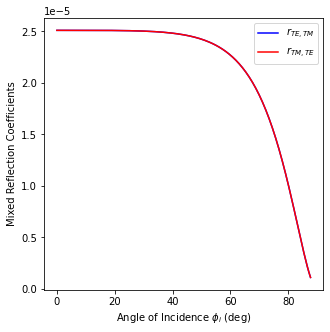

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax_rtmtm, = ax.plot(theta_i*180/pi, np.abs(rtetm_points)**2, color= 'blue', label=r'$r_{{TE,TM}}$') 
ax_rtete, = ax.plot(theta_i*180/pi, np.abs(rtmte_points)**2, color= 'red', label=r'$r_{{TM,TE}}$')

ax.legend(handles=[ax_rtmtm, ax_rtete], prop={'size': 10})
ax.set_ylabel(r'Mixed Reflection Coefficients')
ax.set_xlabel(r'Angle of Incidence $\phi_i$ (deg)')
plt.show()
fig.savefig('Plots_good/Fresnel_mixed_Air-TI_({},{}).png'.format(data1['e2'],data1['m2']), bbox_inches='tight')

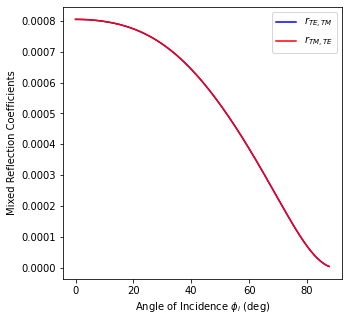

In [16]:
fig, ax = plt.subplots(figsize=(5,5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax_rtmtm, = ax.plot(theta_i*180/pi, np.abs(rtetmMU_points1)**2, color= 'blue', label=r'$r_{{TE,TM}}$') 
ax_rtete, = ax.plot(theta_i*180/pi, np.abs(rtmteMU_points1)**2, color= 'red', label=r'$r_{{TM,TE}}$')

ax.legend(handles=[ax_rtmtm, ax_rtete], prop={'size': 10})
ax.set_ylabel(r'Mixed Reflection Coefficients')
ax.set_xlabel(r'Angle of Incidence $\phi_i$ (deg)')
plt.show()
fig.savefig('Plots_good/Fresnel_mixed_Air-TI-MU_({},{}).png'.format(dataMu3['e2'],dataMu3['m2']), bbox_inches='tight')

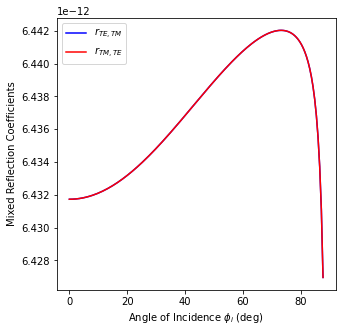

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax_rtmtm, = ax.plot(theta_i*180/pi, np.abs(rtetmMU_points2)**2, color= 'blue', label=r'$r_{{TE,TM}}$') 
ax_rtete, = ax.plot(theta_i*180/pi, np.abs(rtmteMU_points2)**2, color= 'red', label=r'$r_{{TM,TE}}$')

ax.legend(handles=[ax_rtmtm, ax_rtete], prop={'size': 10})
ax.set_ylabel(r'Mixed Reflection Coefficients')
ax.set_xlabel(r'Angle of Incidence $\phi_i$ (deg)')
plt.show()
fig.savefig('Plots_good/Fresnel_mixed_Air-MU-TI_({},{}).png'.format(dataMu2['e3'],dataMu2['m3']), bbox_inches='tight')

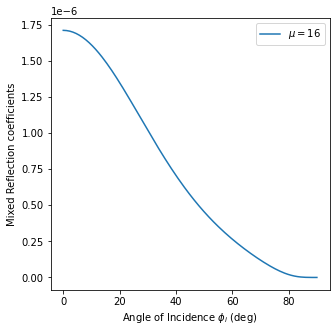

In [9]:
def generate_datas_mu2(m2s):
    datas = []
    for m2 in m2s:
        data_th = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1,"n1" : 1, "theta1" : 0, "theta2" : pi, "theta3": 0,  "w" : 1}
        data_th['w'] = data_th['c']*2*pi/(600*10**(-9))
        data_th["e2"] = 1
        data_th["m2"] = m2
        data_th["n2"] = np.sqrt(data_th["e2"]*data_th["m2"])
        data_th["e3"] = 1
        data_th["m3"] = 10**5
        data_th["n3"] = 10**(5/2)
        data_th["k1"] = data_th["n1"]*data_th["w"]/data_th["c"]
        data_th["k2"] = data_th["n2"]*data_th["w"]/data_th["c"]
        data_th["k3"] = data_th["n3"]*data_th["w"]/data_th["c"]
        data_th["delta"] = data_th["alpha"]*data_th["m1"]*data_th["m2"]*(data_th["theta1"] - data_th["theta2"])/pi
        data_th["scale"] = (data_th["w"]/(2*pi*data_th["c"]))**(-1)
        data_th["dist12"] = 100*10**(-9)
        data_th["dist23"] = 0
        datas.append(data_th)
    return datas

mus = np.arange(16,17,2)
# mus = np.append(mus,50)
# mus = np.append(mus,100)
theta_i = np.arange(0,pi/2, 0.01)
datas=generate_datas_mu2(mus)
kps = datas[0]['k1']*np.sin(theta_i)

point_sets = []
for data in datas:
    rtetmMU_points = np.abs(rtetmMU(kps, **data))**2
    point_sets.append((rtetmMU_points, data["m2"]))

fig, ax = plt.subplots(figsize=(5,5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

handles = []
for ps in point_sets:
    ax_thicc, = ax.plot(theta_i*180/pi, ps[0]**2, label=r'$\mu=${}'.format(ps[1])) 
    handles.append(ax_thicc)
ax.legend(handles=handles, prop={'size': 10})
ax.set_ylabel(r'Mixed Reflection coefficients')
ax.set_xlabel(r'Angle of Incidence $\phi_i$ (deg)')
plt.show()
fig.savefig('Plots/Fresnel_mus.png', bbox_inches='tight')

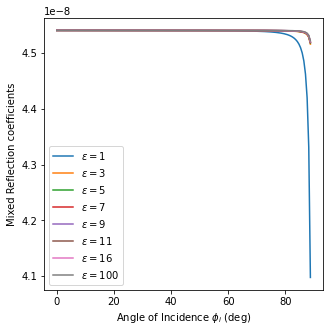

In [10]:
def generate_datas_eps2(eps):
    datas = []
    for ep in eps:
        data_th = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1,"n1" : 1, "theta1" : 0, "theta2" : pi, "theta3": 0,  "w" : 1}
        data_th['w'] = data_th['c']*2*pi/(600*10**(-9))
        data_th["e3"] = ep
        data_th["m3"] = 1
        data_th["n3"] = np.sqrt(data_th["e3"]*data_th["m3"])
        data_th["e2"] = 1
        data_th["m2"] = 10**5
        data_th["n2"] = 10**(5/2)
        data_th["k1"] = data_th["n1"]*data_th["w"]/data_th["c"]
        data_th["k2"] = data_th["n2"]*data_th["w"]/data_th["c"]
        data_th["k3"] = data_th["n3"]*data_th["w"]/data_th["c"]
        data_th["delta"] = data_th["alpha"]*data_th["m1"]*data_th["m2"]*(data_th["theta1"] - data_th["theta2"])/pi
        data_th["scale"] = (data_th["w"]/(2*pi*data_th["c"]))**(-1)
        data_th["dist12"] = 100*10**(-9)
        data_th["dist23"] = 0
        datas.append(data_th)
    return datas

mus = np.arange(1,12,2)
mus = np.append(mus,16)
mus = np.append(mus,100)
theta_i = np.arange(0,pi/2-(1*pi/180), 0.01)
datas=generate_datas_eps2(mus)
kps = datas[0]['k1']*np.sin(theta_i)

point_sets = []
for data in datas:
    rtetmMU_points = np.abs(rtetmMU(kps, **data))**2
    point_sets.append((rtetmMU_points, data["e3"]))

fig, ax = plt.subplots(figsize=(5,5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

handles = []
for ps in point_sets:
    ax_thicc, = ax.plot(theta_i*180/pi, ps[0]**2, label=r'$\epsilon=${}'.format(ps[1])) 
    handles.append(ax_thicc)
ax.legend(handles=handles, prop={'size': 10})
ax.set_ylabel(r'Mixed Reflection coefficients')
ax.set_xlabel(r'Angle of Incidence $\phi_i$ (deg)')
plt.show()
fig.savefig('Plots/Fresnel_mus.png', bbox_inches='tight')